A logical question first: deep learning von Neumann entropy from Renyi entropy or the alternative method? (In the first case, for each set of physical parameter, we only have one data point, which is not suitable for DL application)


There are a few cases that we can study:

1. Single Interval (both analytic Renyi and von Neumann are known)

2. Single Interval at finite temperature and finite length (analytic Renyi is known, but von Neumann only known in high and low T expansions, we can do interpolation)

3. Two Intervals (the general analytic Renyi is known, involves Riemann-Siegel theta fun; von Neumann unknown)
(a) Small cross ratio $x \to 0$ expansion: can get an approx of Renyi in orders of $x$.
    (i) the analytic form of von Neumann to 1st order in $x$ is known. 
    
    (ii)the analytic forms of von Neumann to 2nd order and above are unknown
    (but we studied 2nd order in our paper, which is also hard to go to large $k$)
    
(b) Decompactification limit $\eta \to \infty$: can get an approx of Renyi, as well as a good "approx" of von Neumann.

(c) Most general $x$ and $\eta$: von Neumann unknown, can only do the sum in our method for up to $k~15$ due to theta fun.

4. Mutual Information with all the above cases.

Actually we have analytic results for single interval finite T case and 2nd order small x.

Note that we can also compare with XXZ spin-chain model.

5. Other entanglement measure (modular entropy, relative entropy, reflected entropy, fidelity, free energy, entanglement negativity etc...) in both condensed matter and holographic systems.

We tell NN the coefficients of the generating function $G(z;\rho)$ up to a chosen $k$ in the Taylor expansion (then $k$ would become one of the hyperparameter, if k could be small, the better).

We will feed in answers from the "correct analytic formula" (or the best known approx) with different physical parameters (not $k$!).

NN will learn a function (we may tell NN perhaps a functional form/ansata). 

We then compare it to the one we get by simply summing all the coefficients (this is just like taking $w \to 1$, the limit of getting the vN entropy). We must note that in our original approach, if $k$ small, we will get large error compared to the correct answer. If NN can use smaller $k$, but get a better result than the sum, good! This is because the coefficients up to $k$ order is the "amount of information" we have.


But in case "3-(c)" we can also try a DL framework to estimate the values of higher $k$ for improvement of the alternative method.

A few places for improvements: (see the better general workflow later)

1. More data input (not increasing $k$, but sets of data); More layers and nodes. Is this always a good way?
2. Use different train_test_split (set up random_state)
3. Use different activation functions (sigmoid, relu, etc...) in different combinations and order
4. Scaler to scale the data to a certain range. This may avoid extreme values. Will this help? Probably not, no extreme values.
5. Different types of hidden layers. (For regression, should just use Dense)
6. Different optimizers (we may use SGD and adjustment of the learning rate, momentum).
A few built-in options:

Optimizers:
1. SGD(with or without momentum) 
2. RMSprop (this optimizer is good for virtually any problem)
3. Adam
4. Adagrad
optimizer = keras.optimizers.RMSprop(learning_rate=1e-4) to add learning rate

7. Different loss functions.
8. Adjusting training epochs
9. We can also use train-validation-test separation.
10. Use dropout, batch training etc... 
11. We can assume the NN at least know some functional form of the von Neumann.

12. Or we can just use the same framework as in the paper.

13. QML algorithms?


The best way to improve a DL model is to train it with more data or better data (with enough representaion power, usually denser data points)! 

But we cannot increase the data points indefinitely. I will currently fix data points to 5000~20000 (and let $k$ never exceeds 200 such that the discrepancy of correct vs. approximate entropies are large enough), but with a denser distribution of physical parameters.

1. Maintaing a holdout validation set: this is the way to go when you have plenty of data.
2. Doing K-fold cross-validation: this is the right choice when you have too few samples for holdout validation to be reliable.
3. Doing iterated K-fold validation: this is for performing highly accurate model evaluation when little data is available.

We will perhaps want to do all the above cases if we are going to reduce the dataset availabe (can we determine the boundary of given data points with optimal performance?).

Why? If we have too few data points, the validation set would end up being very small. As a consequence, the validation scores might change a lot depending on which data points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The ideal model is one that stands right at the border between underfitting and overfitting. To figure out how big a model you will need, you must develop a model that overfits, this is easily done by:

1. Add layers
2. Make the layers bigger
3. Train for more epochs
When you see the model's performance on the validation data begins to degrade, you have achieved overfitting.

Improving model fit:

To achieve the perfect fit, you must first overfit. Since you don't know in advance where the boundary lies, you must cross it to find it. A model shows some generalization power means that it is able to overfit. There are three common problems:

1. Training doesn't get started: your training loss doesn't go down over time.
2. Training gets started just fine, but your model doesn't meanfully generalize: you cannot beat the common-sense baseline you set.
3. Training and validation loss both go down over time, and you can beat your baseline, but you don't seem to be able to overfit, which indicates you are still underfitting.


For case 1--> tuning key gradient descent parameters

Sometimes training doesn't get started, or it stalls too early. Your loss is stuck. This is "always" something you can overcome. Even if nothing about your problem makes sense, you should still be able to train something-if only by memorizing the training data.

This is always a problem with the configuration of the gradient descent process, your choice of optimizer, the distribution of initial values in the weights of your model, your learning rate, or your batch size. All these parameters and interdependent, and as such it is usually "sufficient to tune the learning rate and the batch size" while keeping the rest of the parameters constant.

If you find yourself in a similar situation, try 

1. Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, and a learning rate that is too low may make training so slow that it appears to stall.

2. Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

For case 2--> leveraging better architecture priors

You have a model that fits, but for some reason your validation metrics aren't improving at all. Your model trains but doesn't generalize. This is perhaps the worst machine learning situation. It indicates that something is fundamentally wrong with your approach, and it may not be easy to tell what.

First, it may be that the input data you are using simply doesn't contain sufficient information to predict your targets: the problem as formulated is not solvable. 

It may also be that the kind of model you are using is not suited for the problem at hand. Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors. 

For case 3--> increasing model capacity

If you manage to get to a model that fits, where validation metrics are going down, and that seems to achieve some level of generalization power, next, you need to get your model to start overfitting.

In this case, validation metrics seem to stall, or to imrpove very slowly, instead of peaking and reversing course. The validation loss goes to, say, 0.26 and just stays there. You can fit, but you cannot clearly overfit, even after many iterations over the training data.

It should always be possible to overfit. If you cannot seem to be able to overfit, it's likely a problem with the "represnetational power" on your model: you are going to need a bigger model, one with more "capacity", that is to say, one able to store more information.

You can increase representational power by
1. adding more layers
2. using bigger layers (layers with more parameters)
3. using kinds of layers that are more appropriate for the problem (better architecture priors)

Improving Generalization

Once the model has some generalization power and be able to overfit, we should focus on maximizing generalization.

EarlyStopping:

We would start by training our models for longer than needed to figure out the number of epochs that yielded the best validation metrics, and then we would retrain a new model for exactly that number of epochs. This is standard, but it requires you to do redundant work, which can sometimes be expensive. 

Naturally, you could just save your model at the end of each epoch, and once you have found the best epoch, reuse the closest saved model you have.  In Keras, we can do this with an "EarlyStopping" callback, which will interrupt training as soon as validation metrics have stopped improving, while remembering the best known model state. (check this)

Regularizing your model:

Regularization techniques are a set of best practices that actively impede the model's ability to fit perfectly to the training data, with the goal of making the model perform better during validation. It tends to make the model simpler, more "regular", its curve smoother, more generic; thus it is less specific to the training set and better able to generalize by more closely approximating the latent manifold of the data. 

Three common approaches:

1. Reducing the network's size

2. Adding weight regularization

3. Adding dropout

Case 1: reducing the network's size

There is no magical formula to determine the right number of layers or the right size for each layer. You must evaluate an array of different architectures (on your validation set, not on the test set) in order to find the correct model size for your data. The general workflow is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

The smaller model starts overfitting later than the large model, and its performance degrades (the increase of validation loss) more slowly once it starts overfitting. Then we add to the model with much more capacity, while it is standard to work with models that are significantly overparameterized, there can definitely be such a thing as "too much" memorization capacity.

You will know your model is "too large" if it starts overfitting right away and if its validation loss curve looks choppy with high variacne (although choppy validation metrics could also be a symptom of using an unreliable validation process, such as a validation split that is too small).

The bigger model starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier. It gets training loss near zero very quickly. 

The more capacity the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

Case 2: adding weight regularization (if your model is small)

Occam's razor applies to DL models: given some training data and a network architecture, multiple sets of weight values (multiple models) could explain the data. Simpler models are less likely to overfit than complex ones.

A simple model in this context is a model where the distribution of parameter values has "less entropy" (or a model with fewer parameters). Thus, a common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more "regular." This is called "weight regularization", and it's done by adding to the loss function of the model a cost associated with having large weights. This cost comes in two flavors:

1. L1 regularization: the cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights)
2. L2 regularization: the cost addd is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks.  

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

from tensorflow.keras import regularizers

...

layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation = ...)

this means every coefficient in the weight matrix of the layer will add $0.002*\text{weight_coefficient_value}**2$ to the total loss of the model. Note that because this penalty is "only added at training time", the loss for this model will be much higher at training than at test time. With L2 regularization, the model will be more resistent to overfitting.

One can also use:

regularizers_l1(0.001)  L1 regularization

regularizers.l1_l2(l1=0.001, l2=0.001) L1 and L2 simultaneously

Case 3: adding dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. The "dropout rate" is the fraction of the features that are zeroed out; it's usually set between 0.2 and 0.5.

At test time, no units are dropped out; instead, the layer's output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

This technique may seem strange and arbitrary. Why would this help reduce overfitting? Randomly moving a different subset of neurons on each example would prevent "conspiracies" and thus reduce overfitting. The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren't significant (the "conspiracies"), which the model will start memorizing if no noise is present.

In Keras, we just introduce dropout layer

model = Keras.Sequential([layers.Dense(...),
                          layers.Dropout(0.5),
                          layers.Dense(...),
                          layers.Dropout(0.5),...])
                          
To recap, these are the most common ways to maximize generalization and prevent overfitting in neural networks:

1. Get more training data, or better training data
2. Develop better features
3. Reduce the capacity of the model
4. Add weight regularization (for smaller models)
5. Add dropout

Summary of general workflow:

Scale up: Develop a model that overfits

Once we have statistical power, the question becomes: is your model sufficiently powerful? Does it have enough layers and parameters to properly model the problem at hand? The ideal model is one that stands right at the border between underfitting and overfitting, between undercapacity and overcapacity. To figure out how big a model you will need, you must develop a model that overfits, this is easily done by:

1. Add layers
2. Make the layers bigger
3. Train for more epochs

When you see the model's performance on the validation data begins to degrade, you have achieved overfitting.



Regularize and tune the model

The next task is to maximize generalization performance. Need to repeatedly modify the model, train it, evaluate on the validation data (not the test data at this point), modify it again...until the model is as good as it can get. A few things to try

1. Try different architectures; add or remove layers
2. Add dropout
3. If your model is small, add L1 or L2 regularization
4. Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration
5. Optionally, iterate on data curation or feature engineering: collect and annotate more data, develop better features, or remove features that don't seem to be informative

Use the automated hyperparameter tuning software, such as "KerasTuner."

Warning: every time you use feedback from your validation process to tune your model, you leak information about the validation process into the model. Repeated just a few times would not be harmful. But if we do it systematically over many iterations, it will eventually cause your model to overfit to the validation process (even though no model is directly trained on any of the validation data). This makes the evaluation process less reliable.

Then we will try last time on the test data. If it turns out the performance is worse than the measured on the validation data, this may mean
1. Your validation procedure wasn't reliable after all
2. You began overfitting to the validation data while tuning the parameters of the model
In this case, we may switch to a more reliable evaluation protocol (such as iterated K-fold validation).

To do/Check:

Better Data.

Resolve the validation loss/no overfitting problem. I will assume that we fall into case 3 above and I will try to use KerasTuner to add layers/more units.

Generalization (EarlyStopping, dropout etc.)

Hyperparameter tuning-->use KerasTuner!

GPU TensorFlow?

### Single Interval

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

Physical parameter of data distributes as $L=1, L<51, L+=0.005$.

10000 total data sets, with k_max=50.

80% for training, 10% validation, 10% test.

Data may not be very homogeneous (a point to improve in preparing data). But I don't think this should be a major problem as the DL model should be able to overcome this. In fact, we should use non-homogeneous data.

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_csv('Data_Single_Interval.csv')
#df

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')
df

# use a different data set

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,0.767528,0.749302,0.437659,0.117349,0.051328,0.029216,0.019315,0.013934,0.010616,0.008396,...,0.000446,0.000427,0.000409,0.000392,0.000377,0.000362,0.000348,0.000335,0.000322,0.000311
1,0.769191,0.750895,0.438359,0.117652,0.051479,0.029303,0.019372,0.013975,0.010648,0.008421,...,0.000448,0.000429,0.000411,0.000394,0.000378,0.000363,0.000349,0.000336,0.000323,0.000312
2,0.770845,0.752481,0.439056,0.117954,0.051629,0.029390,0.019429,0.014016,0.010679,0.008446,...,0.000450,0.000430,0.000412,0.000395,0.000379,0.000364,0.000350,0.000337,0.000325,0.000313
3,0.772491,0.754058,0.439748,0.118253,0.051779,0.029477,0.019486,0.014057,0.010711,0.008471,...,0.000451,0.000432,0.000414,0.000397,0.000381,0.000366,0.000351,0.000338,0.000326,0.000314
4,0.774129,0.755627,0.440436,0.118552,0.051928,0.029563,0.019543,0.014098,0.010742,0.008496,...,0.000453,0.000433,0.000415,0.000398,0.000382,0.000367,0.000353,0.000339,0.000327,0.000315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.077970,1.939087,0.789544,0.320856,0.178727,0.114865,0.080510,0.059902,0.046567,0.037433,...,0.002643,0.002540,0.002444,0.002353,0.002268,0.002187,0.002111,0.002039,0.001971,0.001906
9996,2.078010,1.939115,0.789549,0.320859,0.178730,0.114867,0.080512,0.059903,0.046568,0.037433,...,0.002643,0.002540,0.002444,0.002353,0.002268,0.002187,0.002111,0.002039,0.001971,0.001906
9997,2.078040,1.939142,0.789555,0.320863,0.178733,0.114870,0.080513,0.059904,0.046569,0.037434,...,0.002643,0.002540,0.002444,0.002353,0.002268,0.002187,0.002111,0.002039,0.001971,0.001906
9998,2.078070,1.939170,0.789560,0.320867,0.178736,0.114872,0.080515,0.059906,0.046570,0.037435,...,0.002643,0.002540,0.002444,0.002353,0.002268,0.002187,0.002111,0.002039,0.001971,0.001907


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


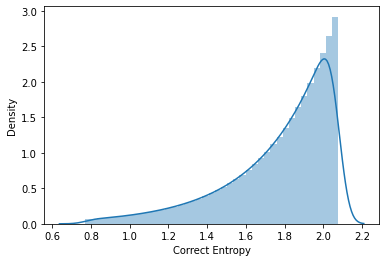

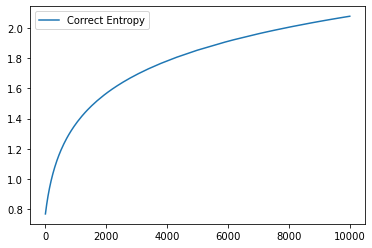

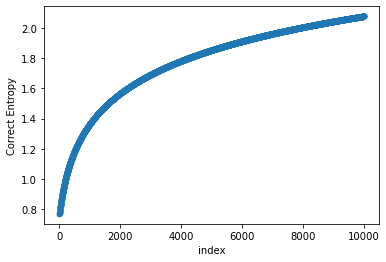

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
# this will fit all data points to 0~1

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# this will fit data points to be mean=0, variance=1

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [2]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.437659,0.117349,0.051328,0.029216,0.019315,0.013934,0.010616,0.008396,0.006825,0.005668,...,0.000446,0.000427,0.000409,0.000392,0.000377,0.000362,0.000348,0.000335,0.000322,0.000311
1,0.438359,0.117652,0.051479,0.029303,0.019372,0.013975,0.010648,0.008421,0.006846,0.005685,...,0.000448,0.000429,0.000411,0.000394,0.000378,0.000363,0.000349,0.000336,0.000323,0.000312
2,0.439056,0.117954,0.051629,0.029390,0.019429,0.014016,0.010679,0.008446,0.006867,0.005702,...,0.000450,0.000430,0.000412,0.000395,0.000379,0.000364,0.000350,0.000337,0.000325,0.000313
3,0.439748,0.118253,0.051779,0.029477,0.019486,0.014057,0.010711,0.008471,0.006887,0.005720,...,0.000451,0.000432,0.000414,0.000397,0.000381,0.000366,0.000351,0.000338,0.000326,0.000314
4,0.440436,0.118552,0.051928,0.029563,0.019543,0.014098,0.010742,0.008496,0.006907,0.005737,...,0.000453,0.000433,0.000415,0.000398,0.000382,0.000367,0.000353,0.000339,0.000327,0.000315


In [3]:
from sklearn.model_selection import train_test_split

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

print(X_train_full.shape) # this is for later use in KerasTuner by includin training + validation
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9000, 50)
(8000, 50)
(1000, 50)
(1000, 50)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun


# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In below we adopt the KerasTuner approach. Do not run the above block.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

The next step is to define a "tuner." Schematically, you can think of a tuner as a for loop that will repeatedly

1. Pick a set of hyperparameter values
2. Call the model-building function with these values to create a model
3. Train the model and record its metrics

KerasTuner has several built-in tuners available-->RandomSearch, BayesianOptimization, and Hyperband.

Let's try BayerianOptimization, a tuner that attempts to make smart predictions for which new hyperparameter values are likely to perform best given the outcomes of previous choices:

In [6]:
tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="singleintervaltest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

In [7]:
# display an overview of the search space via search_space_summary()

tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}


Finally we launch the search. Remember to pass validation data, and make sure not to use the test set as validation data. Otherwise we'd quickly start overfitting to the test data, and we wouldn't be able to trust the test metrics anymore.

In [8]:
callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

Trial 10 Complete [00h 00m 02s]
val_loss: 0.0001466006797272712

Best val_loss So Far: 0.00013724878954235464
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit


In [9]:
# query the best hyperparameter configurations, can then be used to retrain

top_n = 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps

When retraining these models, you may want to include the validation data as part of the training data, since you won't be making any further hyperparameter changes, and thus you will no longer be evaluating performance on the validation data. In the example, we'd train these final models on the totality of the original training data, without reserving a validation set.

Before we can train on the full training data, there is one last parameter we need to settle: the optimal number of epochs to train for.

Typically, you will want to train the new models for longer than you did during the search: using an aggresive "patience" value in the EarlyStopping callback saves time during the search, but it may lead to under-fit models. Just use the validation set to find the best epoch:

There is one last parameter we need to settle: the optimal number of epochs to train for. 

No need to do the following not. The model is already saved at its best performing epoch evaluated on the validation_data.

In [10]:
def get_best_epoch(hp):
    model = build_model(hp)
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=10)] # very high patience
    history = model.fit(x = X_train, y = y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, callbacks=callbacks)
    val_loss_per_epoch = history.history["val_loss"]
    best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
    print(f"Best epoch: {best_epoch}")
    return best_epoch

Finally, train the full dataset (training + validation) for just a bit longer than this epoch count, since you are training on more data; we train for 20% more in this case:

In [11]:
def get_best_trained_model(hp):
    best_epoch = get_best_epoch(hp)
    model.fit(X_train_full, y_train_full, batch_size=128, epochs=int(best_epoch*1.2)) 
    return model

In [12]:
best_models = []
for hp in best_hps:
    model = get_best_trained_model(hp)
    model.evaluate(X_test, y_test)
    best_models.append(model)

Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 2.6143 - mae: 1.5912 - val_loss: 2.0611 - val_mae: 1.4144
Epoch 2/100
63/63 [==============================] - 0s 756us/step - loss: 1.5907 - mae: 1.2329 - val_loss: 1.0983 - val_mae: 1.0237
Epoch 3/100
63/63 [==============================] - 0s 788us/step - loss: 0.6767 - mae: 0.7813 - val_loss: 0.2991 - val_mae: 0.5167
Epoch 4/100
63/63 [==============================] - 0s 741us/step - loss: 0.1157 - mae: 0.2912 - val_loss: 0.0258 - val_mae: 0.1304
Epoch 5/100
63/63 [==============================] - 0s 772us/step - loss: 0.0244 - mae: 0.1225 - val_loss: 0.0211 - val_mae: 0.1154
Epoch 6/100
63/63 [==============================] - 0s 773us/step - loss: 0.0191 - mae: 0.1074 - val_loss: 0.0155 - val_mae: 0.0956
Epoch 7/100
63/63 [==============================] - 0s 754us/step - loss: 0.0134 - mae: 0.0898 - val_loss: 0.0103 - val_mae: 0.0789
Epoch 8/100
63/63 [==============================] - 0s 757us/step - lo

NameError: name 'model' is not defined

Note that if you are not worried about slightly underperforming, there is a shortcut you can take: just use the tuner to reload the top-performing models with the best weights saved during the hyperparameter search, without retraining new models from scratch:

best_models = tuner.get_best_models(top_n)

Note that one important issue to think about when doing automatic hyperparameter optimization at scale is validation-set overfitting. Because you are updating hyperparameters based on a signal that is computed using your validation data, you are effectively training them on the validation data, and thus they will quickly overfit to the validation data.

In [13]:
best_models = tuner.get_best_models(top_n)
best_models

In [6]:
model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 128, validation_data=(X_val, y_val)) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode
# we added validation data

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.1067 - mae: 0.1557 - val_loss: 0.0054 - val_mae: 0.0680
Epoch 2/100
250/250 [==============================] - 0s 634us/step - loss: 0.0055 - mae: 0.0695 - val_loss: 0.0031 - val_mae: 0.0549
Epoch 3/100
250/250 [==============================] - 0s 649us/step - loss: 0.0048 - mae: 0.0660 - val_loss: 0.0056 - val_mae: 0.0744
Epoch 4/100
250/250 [==============================] - 0s 615us/step - loss: 0.0045 - mae: 0.0648 - val_loss: 0.0018 - val_mae: 0.0407
Epoch 5/100
250/250 [==============================] - 0s 629us/step - loss: 0.0042 - mae: 0.0619 - val_loss: 0.0040 - val_mae: 0.0626
Epoch 6/100
250/250 [==============================] - 0s 613us/step - loss: 0.0040 - mae: 0.0611 - val_loss: 0.0031 - val_mae: 0.0546
Epoch 7/100
250/250 [==============================] - 0s 617us/step - loss: 0.0038 - mae: 0.0593 - val_loss: 0.0025 - val_mae: 0.0495
Epoch 8/100
250/250 [==============================] - 0s

Epoch 61/100
250/250 [==============================] - 0s 693us/step - loss: 9.5169e-04 - mae: 0.0298 - val_loss: 0.0016 - val_mae: 0.0398
Epoch 62/100
250/250 [==============================] - 0s 686us/step - loss: 9.4528e-04 - mae: 0.0298 - val_loss: 7.8762e-04 - val_mae: 0.0276
Epoch 63/100
250/250 [==============================] - 0s 637us/step - loss: 9.2371e-04 - mae: 0.0292 - val_loss: 0.0015 - val_mae: 0.0387
Epoch 64/100
250/250 [==============================] - 0s 624us/step - loss: 9.1937e-04 - mae: 0.0293 - val_loss: 8.1422e-04 - val_mae: 0.0283
Epoch 65/100
250/250 [==============================] - 0s 654us/step - loss: 9.0590e-04 - mae: 0.0289 - val_loss: 0.0012 - val_mae: 0.0342
Epoch 66/100
250/250 [==============================] - 0s 645us/step - loss: 8.9545e-04 - mae: 0.0290 - val_loss: 0.0010 - val_mae: 0.0315
Epoch 67/100
250/250 [==============================] - 0s 653us/step - loss: 8.8414e-04 - mae: 0.0284 - val_loss: 0.0010 - val_mae: 0.0317
Epoch 68/100

In [7]:
model.weights # show the weights of all units in the model

[<tf.Variable 'dense/kernel:0' shape=(50, 64) dtype=float32, numpy=
 array([[ 0.03175202, -0.19258088, -0.10230084, ...,  0.03178085,
          0.00374114,  0.16216423],
        [ 0.08935735,  0.11513428, -0.07067291, ..., -0.15793051,
         -0.03092427, -0.18097706],
        [-0.17963679,  0.1211807 ,  0.2116855 , ...,  0.14778368,
          0.08516879, -0.2734936 ],
        ...,
        [-0.07617106, -0.03173135, -0.0186293 , ..., -0.22614145,
          0.18694474, -0.44754222],
        [-0.1429913 , -0.0774013 , -0.17576489, ..., -0.07135855,
          0.47802478, -0.49890235],
        [ 0.16187677, -0.08545806,  0.09846176, ..., -0.1465147 ,
          0.284215  , -0.10149994]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.00423915,  0.        ,  0.        , -0.10856755, -0.15155593,
         0.        , -0.0866233 , -0.05470463, -0.12247694, -0.01825435,
         0.        , -0.004597  ,  0.        ,  0.        , -0.051562  ,
       

In [8]:
# after the model is built, you can display its contents via the summary() method

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 15,809
Trainable params: 15,809
Non-trainable params: 0
_________________________________________________________________


In [15]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df.plot()

plt.plot(best_models.history.history["loss"], label="Loss")
plt.plot(best_models.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(best_models.history.history["val_loss"], label="Val_Loss")
plt.plot(best_models.history.history["val_mae"], label="Val_MAE")
plt.title("Validation Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# actually we should put training and validation loss as one fig and mae as one fig 
# (as the validation loss should eventually go up, i.e. we want to find the boundary of overfitting)

AttributeError: 'list' object has no attribute 'history'

In [14]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df.plot()

plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model.history.history["val_loss"], label="Val_Loss")
plt.plot(model.history.history["val_mae"], label="Val_MAE")
plt.title("Validation Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# actually we should put training and validation loss as one fig and mae as one fig 
# (as the validation loss should eventually go up, i.e. we want to find the boundary of overfitting)

NameError: name 'model' is not defined

In [8]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_val, y_val, verbose=0))     # The validation error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

[0.000445059675257653, 0.020592495799064636]
[0.00044693134259432554, 0.02067357487976551]
[0.0004512197047006339, 0.020641539245843887]


In [9]:
test_predictions = model.predict(X_test)
test_predictions

array([[1.9498098 ],
       [1.8547928 ],
       [1.543872  ],
       [1.8588096 ],
       [1.843251  ],
       [1.9544469 ],
       [1.2301006 ],
       [1.889126  ],
       [1.9556488 ],
       [1.1637061 ],
       [1.684513  ],
       [2.0096772 ],
       [1.8935168 ],
       [1.9164929 ],
       [1.8034865 ],
       [1.9379946 ],
       [1.2328123 ],
       [2.0913136 ],
       [1.9898115 ],
       [2.036725  ],
       [2.0903757 ],
       [1.6223705 ],
       [1.8517147 ],
       [2.0787797 ],
       [1.8726465 ],
       [2.0910382 ],
       [1.5811616 ],
       [2.039997  ],
       [1.9672942 ],
       [2.0597649 ],
       [1.0921433 ],
       [1.6762382 ],
       [1.850659  ],
       [1.8727788 ],
       [2.0432365 ],
       [1.7455022 ],
       [1.9127377 ],
       [1.0443029 ],
       [1.8013827 ],
       [1.9693066 ],
       [1.910251  ],
       [0.82979983],
       [2.0443895 ],
       [1.502555  ],
       [2.0738971 ],
       [0.8322636 ],
       [1.8640712 ],
       [1.757

In [10]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']
#test_pred.index = [8, 1, 5]
#test_pred

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)
#pred_df_reset_index

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare

,Correct Entropy,Model Predictions
0,1.92547,1.949810
1,1.83266,1.854793
2,1.52335,1.543872
3,1.83660,1.858810
4,1.82135,1.843251
...,...,...
995,1.77604,1.797135
996,1.94712,1.972055
997,1.71134,1.731600
998,1.55777,1.577779


<AxesSubplot:xlabel='Correct Entropy', ylabel='Model Predictions'>

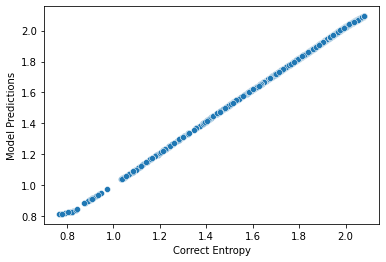

In [11]:
sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare)

### Single Interval at Finite Temperature and Finite Length (all T) (Varying T)

Note that we can also fix T but vary length.

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

Physical parameter of data distributes as $\beta=0.1, \beta<3.1, \beta+=0.03$  (not including $\beta=3.07$)

20000 data points.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('Data_Single_Interval_allT.csv')
df

# Note that the data here needs specal attention. 
# The first row has large deviation between correct and approx entropies.
# The correct entropy for low temperature regime is barely changing.

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,200
0,4.623360,4.102218,0.968806,0.469857,0.304185,0.221792,0.172683,0.140193,0.117184,0.100086,...,0.001399,0.001388,0.001378,0.001367,0.001357,0.001347,0.001338,0.001328,0.001318,0.001309
1,3.502510,3.273667,0.927697,0.432383,0.269933,0.190405,0.143846,0.113631,0.092655,0.077379,...,0.000719,0.000713,0.000708,0.000702,0.000696,0.000691,0.000686,0.000680,0.000675,0.000670
2,2.816530,2.694443,0.879053,0.390748,0.234082,0.159343,0.116767,0.089880,0.071696,0.058774,...,0.000422,0.000418,0.000415,0.000411,0.000408,0.000405,0.000401,0.000398,0.000395,0.000392
3,2.357110,2.282567,0.829295,0.350877,0.201778,0.132873,0.094828,0.071487,0.056102,0.045408,...,0.000274,0.000272,0.000270,0.000267,0.000265,0.000263,0.000261,0.000259,0.000256,0.000254
4,2.030170,1.980069,0.781846,0.315227,0.174530,0.111668,0.078022,0.057924,0.044962,0.036105,...,0.000193,0.000191,0.000190,0.000188,0.000186,0.000185,0.000183,0.000182,0.000180,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.386329,0.384570,0.251501,0.050257,0.020773,0.011989,0.008011,0.005781,0.004383,0.003443,...,0.000009,0.000009,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
96,0.386295,0.384538,0.251486,0.050252,0.020771,0.011988,0.008010,0.005780,0.004382,0.003442,...,0.000009,0.000009,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
97,0.386264,0.384509,0.251472,0.050248,0.020769,0.011986,0.008009,0.005780,0.004381,0.003442,...,0.000009,0.000009,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
98,0.386236,0.384482,0.251460,0.050244,0.020767,0.011985,0.008008,0.005779,0.004381,0.003441,...,0.000009,0.000009,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


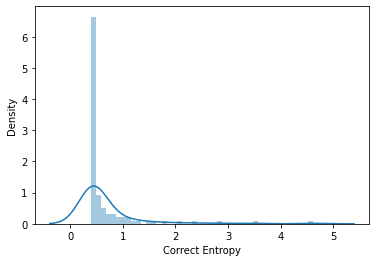

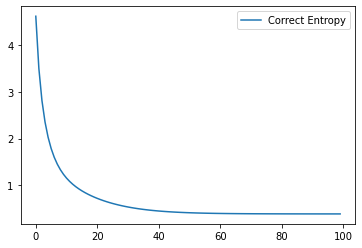

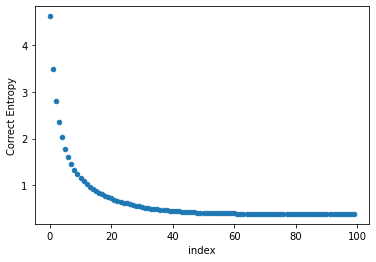

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.968806,0.469857,0.304185,0.221792,0.172683,0.140193,0.117184,0.100086,0.086918,0.076492,...,0.001399,0.001388,0.001378,0.001367,0.001357,0.001347,0.001338,0.001328,0.001318,0.001309
1,0.927697,0.432383,0.269933,0.190405,0.143846,0.113631,0.092655,0.077379,0.065846,0.056891,...,0.000719,0.000713,0.000708,0.000702,0.000696,0.000691,0.000686,0.000680,0.000675,0.000670
2,0.879053,0.390748,0.234082,0.159343,0.116767,0.089880,0.071696,0.058774,0.049234,0.041976,...,0.000422,0.000418,0.000415,0.000411,0.000408,0.000405,0.000401,0.000398,0.000395,0.000392
3,0.829295,0.350877,0.201778,0.132873,0.094828,0.071487,0.056102,0.045408,0.037659,0.031852,...,0.000274,0.000272,0.000270,0.000267,0.000265,0.000263,0.000261,0.000259,0.000256,0.000254
4,0.781846,0.315227,0.174530,0.111668,0.078022,0.057924,0.044962,0.036105,0.029769,0.025066,...,0.000193,0.000191,0.000190,0.000188,0.000186,0.000185,0.000183,0.000182,0.000180,0.000179


In [4]:
from sklearn.model_selection import train_test_split
X = df1
y = df['Correct Entropy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(90, 200)
(10, 200)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun

# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [6]:
model.fit(x = X_train, y = y_train, epochs = 500) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode

Epoch 1/500
3/3 [==============================] - 0s 1ms/step - loss: 0.6287 - mae: 0.5993
Epoch 2/500
3/3 [==============================] - 0s 996us/step - loss: 0.5852 - mae: 0.5672
Epoch 3/500
3/3 [==============================] - 0s 997us/step - loss: 0.5569 - mae: 0.5453
Epoch 4/500
3/3 [==============================] - 0s 997us/step - loss: 0.5335 - mae: 0.5280
Epoch 5/500
3/3 [==============================] - 0s 499us/step - loss: 0.5120 - mae: 0.5117
Epoch 6/500
3/3 [==============================] - 0s 997us/step - loss: 0.4919 - mae: 0.4955
Epoch 7/500
3/3 [==============================] - 0s 498us/step - loss: 0.4745 - mae: 0.4816
Epoch 8/500
3/3 [==============================] - 0s 499us/step - loss: 0.4577 - mae: 0.4674
Epoch 9/500
3/3 [==============================] - 0s 499us/step - loss: 0.4424 - mae: 0.4552
Epoch 10/500
3/3 [==============================] - 0s 499us/step - loss: 0.4278 - mae: 0.4415
Epoch 11/500
3/3 [==============================] - 0s 997us/

Epoch 172/500
3/3 [==============================] - 0s 499us/step - loss: 3.2935e-04 - mae: 0.0097
Epoch 173/500
3/3 [==============================] - 0s 499us/step - loss: 3.3575e-04 - mae: 0.0100
Epoch 174/500
3/3 [==============================] - 0s 499us/step - loss: 3.3022e-04 - mae: 0.0106
Epoch 175/500
3/3 [==============================] - 0s 498us/step - loss: 3.4530e-04 - mae: 0.0096
Epoch 176/500
3/3 [==============================] - 0s 499us/step - loss: 3.1023e-04 - mae: 0.0103
Epoch 177/500
3/3 [==============================] - 0s 499us/step - loss: 3.2396e-04 - mae: 0.0102
Epoch 178/500
3/3 [==============================] - 0s 498us/step - loss: 3.0773e-04 - mae: 0.0109
Epoch 179/500
3/3 [==============================] - 0s 499us/step - loss: 3.1064e-04 - mae: 0.0102
Epoch 180/500
3/3 [==============================] - 0s 499us/step - loss: 2.7680e-04 - mae: 0.0097
Epoch 181/500
3/3 [==============================] - 0s 499us/step - loss: 2.9960e-04 - mae: 0.0101


3/3 [==============================] - 0s 997us/step - loss: 5.6104e-06 - mae: 0.0014
Epoch 336/500
3/3 [==============================] - 0s 499us/step - loss: 5.6879e-06 - mae: 0.0017
Epoch 337/500
3/3 [==============================] - 0s 499us/step - loss: 5.1155e-06 - mae: 0.0015
Epoch 338/500
3/3 [==============================] - 0s 996us/step - loss: 1.0134e-05 - mae: 0.0021
Epoch 339/500
3/3 [==============================] - 0s 498us/step - loss: 2.7272e-05 - mae: 0.0048
Epoch 340/500
3/3 [==============================] - 0s 998us/step - loss: 2.3909e-05 - mae: 0.0039
Epoch 341/500
3/3 [==============================] - 0s 997us/step - loss: 7.3125e-06 - mae: 0.0015
Epoch 342/500
3/3 [==============================] - 0s 499us/step - loss: 8.6163e-06 - mae: 0.0022
Epoch 343/500
3/3 [==============================] - 0s 998us/step - loss: 1.2284e-05 - mae: 0.0029
Epoch 344/500
3/3 [==============================] - 0s 997us/step - loss: 3.1124e-05 - mae: 0.0047
Epoch 345/500


Epoch 417/500
3/3 [==============================] - 0s 499us/step - loss: 1.9044e-05 - mae: 0.0040
Epoch 418/500
3/3 [==============================] - 0s 498us/step - loss: 2.4253e-05 - mae: 0.0041
Epoch 419/500
3/3 [==============================] - 0s 499us/step - loss: 1.2540e-05 - mae: 0.0030
Epoch 420/500
3/3 [==============================] - 0s 997us/step - loss: 3.2971e-06 - mae: 9.0430e-04
Epoch 421/500
3/3 [==============================] - 0s 997us/step - loss: 3.1639e-06 - mae: 8.8869e-04
Epoch 422/500
3/3 [==============================] - 0s 499us/step - loss: 7.3246e-06 - mae: 0.0018
Epoch 423/500
3/3 [==============================] - 0s 499us/step - loss: 3.0139e-05 - mae: 0.0050
Epoch 424/500
3/3 [==============================] - 0s 997us/step - loss: 1.8162e-05 - mae: 0.0034
Epoch 425/500
3/3 [==============================] - 0s 497us/step - loss: 8.4037e-06 - mae: 0.0024
Epoch 426/500
3/3 [==============================] - 0s 998us/step - loss: 8.0178e-06 - mae:

<AxesSubplot:>

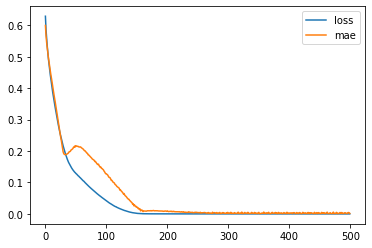

In [7]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [8]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

[6.820395810791524e-06, 0.0019054260337725282]
[0.0018629400292411447, 0.015291032381355762]


In [9]:
test_predictions = model.predict(X_test)
test_predictions

array([[0.38602355],
       [0.40384185],
       [0.38875455],
       [0.4244489 ],
       [0.42821515],
       [0.45282054],
       [0.66882527],
       [0.38639536],
       [1.1480159 ],
       [4.487044  ]], dtype=float32)

In [10]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare

,Correct Entropy,Model Predictions
0,0.387119,0.386024
1,0.405198,0.403842
2,0.389909,0.388755
3,0.425916,0.424449
4,0.429691,0.428215
5,0.454304,0.452821
6,0.670638,0.668825
7,0.387500,0.386395
8,1.153660,1.148016
9,4.623360,4.487044


### Two Intervals at Small $x$ Expansion (First Order in $x$)(Varying x)

Note that in this case we can also fix $x$ while varying $\alpha$.

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

$k$ is only up to 100.

$x=0.1, x<0.6, x+=0.005$

10000 data points

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data_Two_Interval_Firstx.csv')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1.075677,1.046734,0.481315,0.154562,0.082949,0.055171,0.040093,0.030395,0.023676,0.018858,...,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233,0.000229,0.000225
1,1.085920,1.056349,0.484591,0.155865,0.083616,0.055637,0.040484,0.030739,0.023978,0.019119,...,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233,0.000229
2,1.095533,1.065361,0.487636,0.157080,0.084237,0.056072,0.040849,0.031061,0.024261,0.019365,...,0.000275,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233
3,1.104571,1.073823,0.490474,0.158216,0.084818,0.056477,0.041190,0.031363,0.024528,0.019598,...,0.000280,0.000274,0.000269,0.000264,0.000259,0.000255,0.000250,0.000246,0.000241,0.000237
4,1.113085,1.081785,0.493123,0.159279,0.085361,0.056857,0.041510,0.031647,0.024780,0.019818,...,0.000284,0.000279,0.000273,0.000268,0.000263,0.000259,0.000254,0.000249,0.000245,0.000241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.213792,1.169927,0.511237,0.162869,0.086705,0.059177,0.045019,0.035820,0.029100,0.023948,...,0.000380,0.000372,0.000366,0.000359,0.000353,0.000346,0.000340,0.000334,0.000329,0.000323
96,1.211492,1.167713,0.510309,0.162413,0.086478,0.059058,0.044951,0.035777,0.029069,0.023923,...,0.000379,0.000372,0.000365,0.000358,0.000352,0.000346,0.000340,0.000334,0.000328,0.000322
97,1.209127,1.165439,0.509356,0.161947,0.086246,0.058937,0.044883,0.035733,0.029036,0.023896,...,0.000378,0.000371,0.000364,0.000358,0.000351,0.000345,0.000339,0.000333,0.000327,0.000322
98,1.206697,1.163103,0.508379,0.161471,0.086010,0.058814,0.044812,0.035687,0.029003,0.023869,...,0.000377,0.000370,0.000364,0.000357,0.000351,0.000344,0.000338,0.000332,0.000327,0.000321


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


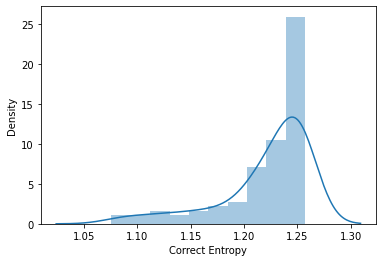

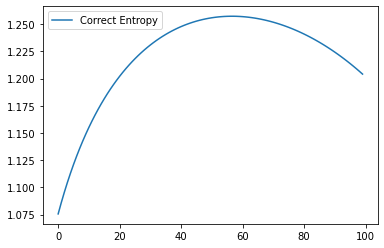

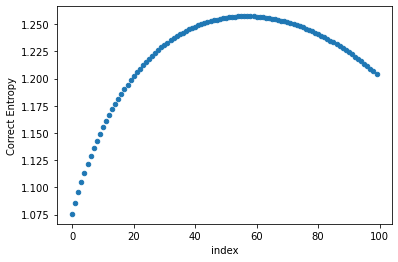

In [12]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [13]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.481315,0.154562,0.082949,0.055171,0.040093,0.030395,0.023676,0.018858,0.015328,0.012694,...,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233,0.000229,0.000225
1,0.484591,0.155865,0.083616,0.055637,0.040484,0.030739,0.023978,0.019119,0.015552,0.012886,...,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233,0.000229
2,0.487636,0.157080,0.084237,0.056072,0.040849,0.031061,0.024261,0.019365,0.015764,0.013068,...,0.000275,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233
3,0.490474,0.158216,0.084818,0.056477,0.041190,0.031363,0.024528,0.019598,0.015965,0.013240,...,0.000280,0.000274,0.000269,0.000264,0.000259,0.000255,0.000250,0.000246,0.000241,0.000237
4,0.493123,0.159279,0.085361,0.056857,0.041510,0.031647,0.024780,0.019818,0.016155,0.013404,...,0.000284,0.000279,0.000273,0.000268,0.000263,0.000259,0.000254,0.000249,0.000245,0.000241


In [15]:
from sklearn.model_selection import train_test_split
X = df1
y = df['Correct Entropy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(90, 100)
(10, 100)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun

# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [17]:
model.fit(x = X_train, y = y_train, epochs = 500) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode

Epoch 1/500
3/3 [==============================] - 0s 1ms/step - loss: 1.4916 - mae: 1.2206
Epoch 2/500
3/3 [==============================] - 0s 498us/step - loss: 1.4746 - mae: 1.2136
Epoch 3/500
3/3 [==============================] - 0s 503us/step - loss: 1.4628 - mae: 1.2088
Epoch 4/500
3/3 [==============================] - 0s 499us/step - loss: 1.4528 - mae: 1.2046
Epoch 5/500
3/3 [==============================] - 0s 998us/step - loss: 1.4437 - mae: 1.2008
Epoch 6/500
3/3 [==============================] - 0s 498us/step - loss: 1.4352 - mae: 1.1973
Epoch 7/500
3/3 [==============================] - 0s 997us/step - loss: 1.4270 - mae: 1.1938
Epoch 8/500
3/3 [==============================] - 0s 500us/step - loss: 1.4189 - mae: 1.1905
Epoch 9/500
3/3 [==============================] - 0s 998us/step - loss: 1.4109 - mae: 1.1871
Epoch 10/500
3/3 [==============================] - 0s 499us/step - loss: 1.4028 - mae: 1.1837
Epoch 11/500
3/3 [==============================] - 0s 498us/

3/3 [==============================] - 0s 499us/step - loss: 0.0168 - mae: 0.1258
Epoch 173/500
3/3 [==============================] - 0s 997us/step - loss: 0.0148 - mae: 0.1176
Epoch 174/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0130 - mae: 0.1096
Epoch 175/500
3/3 [==============================] - 0s 997us/step - loss: 0.0113 - mae: 0.1016
Epoch 176/500
3/3 [==============================] - 0s 499us/step - loss: 0.0097 - mae: 0.0939
Epoch 177/500
3/3 [==============================] - 0s 495us/step - loss: 0.0083 - mae: 0.0863
Epoch 178/500
3/3 [==============================] - 0s 498us/step - loss: 0.0070 - mae: 0.0791
Epoch 179/500
3/3 [==============================] - 0s 498us/step - loss: 0.0059 - mae: 0.0723
Epoch 180/500
3/3 [==============================] - 0s 872us/step - loss: 0.0049 - mae: 0.0659
Epoch 181/500
3/3 [==============================] - 0s 498us/step - loss: 0.0041 - mae: 0.0599
Epoch 182/500
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 998us/step - loss: 8.1600e-04 - mae: 0.0212
Epoch 337/500
3/3 [==============================] - 0s 998us/step - loss: 8.0189e-04 - mae: 0.0217
Epoch 338/500
3/3 [==============================] - 0s 499us/step - loss: 7.9369e-04 - mae: 0.0209
Epoch 339/500
3/3 [==============================] - 0s 998us/step - loss: 8.1211e-04 - mae: 0.0216
Epoch 340/500
3/3 [==============================] - 0s 499us/step - loss: 7.7884e-04 - mae: 0.0202
Epoch 341/500
3/3 [==============================] - 0s 997us/step - loss: 7.7515e-04 - mae: 0.0211
Epoch 342/500
3/3 [==============================] - 0s 998us/step - loss: 7.8328e-04 - mae: 0.0211
Epoch 343/500
3/3 [==============================] - 0s 998us/step - loss: 7.8183e-04 - mae: 0.0204
Epoch 344/500
3/3 [==============================] - 0s 499us/step - loss: 7.7774e-04 - mae: 0.0206
Epoch 345/500
3/3 [==============================] - 0s 499us/step - loss: 8.0142e-04 - mae: 0.0207
Epoch 346/500


3/3 [==============================] - 0s 499us/step - loss: 7.3863e-04 - mae: 0.0212
Epoch 419/500
3/3 [==============================] - 0s 499us/step - loss: 7.3210e-04 - mae: 0.0198
Epoch 420/500
3/3 [==============================] - 0s 998us/step - loss: 7.2878e-04 - mae: 0.0204
Epoch 421/500
3/3 [==============================] - 0s 498us/step - loss: 7.2289e-04 - mae: 0.0205
Epoch 422/500
3/3 [==============================] - 0s 508us/step - loss: 7.2324e-04 - mae: 0.0200
Epoch 423/500
3/3 [==============================] - 0s 997us/step - loss: 7.5256e-04 - mae: 0.0203
Epoch 424/500
3/3 [==============================] - 0s 998us/step - loss: 7.4451e-04 - mae: 0.0202
Epoch 425/500
3/3 [==============================] - 0s 998us/step - loss: 7.3406e-04 - mae: 0.0209
Epoch 426/500
3/3 [==============================] - 0s 498us/step - loss: 7.2243e-04 - mae: 0.0204
Epoch 427/500
3/3 [==============================] - 0s 499us/step - loss: 7.2543e-04 - mae: 0.0200
Epoch 428/500


3/3 [==============================] - 0s 498us/step - loss: 6.7817e-04 - mae: 0.0194


<AxesSubplot:>

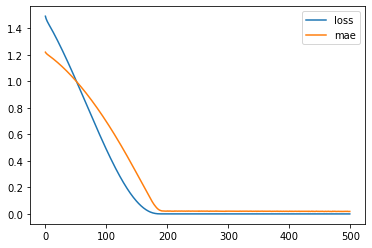

In [18]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [19]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

[0.0006751315668225288, 0.01997135952115059]
[0.0012092717224732041, 0.026368319988250732]


In [20]:
test_predictions = model.predict(X_test)
test_predictions

array([[1.22571  ],
       [1.2331102],
       [1.2312996],
       [1.2315612],
       [1.2312443],
       [1.2292063],
       [1.2151873],
       [1.2273164],
       [1.1949992],
       [1.1650548]], dtype=float32)

In [21]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare

,Correct Entropy,Model Predictions
0,1.236597,1.225710
1,1.256971,1.233110
2,1.251861,1.231300
3,1.252892,1.231561
4,1.252051,1.231244
5,1.246620,1.229206
6,1.209142,1.215187
7,1.240973,1.227316
8,1.155256,1.194999
9,1.075677,1.165055


### Two Intervals at Small $x$ Expansion (Second Order in $x$)(Varying $x$)

Note that in this case we can also fix $x$ while varying $\alpha$.

Actually we have analytic result from (arXiv:1312.5740).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

$k$ is only up to 100.

$x=0.1, x<0.6, x+=0.005$

10000 data points

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data_Two_Interval_Secondx.csv')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0.734460,0.725126,0.423867,0.111389,0.048338,0.027470,0.018160,0.013099,0.009976,0.007885,...,0.000096,0.000094,0.000092,0.000090,0.000088,0.000087,0.000085,0.000083,0.000082,0.000080
1,0.742817,0.733292,0.427486,0.112914,0.049085,0.027899,0.018440,0.013300,0.010129,0.008007,...,0.000097,0.000096,0.000094,0.000092,0.000090,0.000088,0.000087,0.000085,0.000083,0.000082
2,0.750508,0.740806,0.430799,0.114319,0.049776,0.028296,0.018700,0.013486,0.010272,0.008120,...,0.000099,0.000097,0.000095,0.000093,0.000092,0.000090,0.000088,0.000086,0.000085,0.000083
3,0.757592,0.747726,0.433836,0.115614,0.050415,0.028663,0.018940,0.013659,0.010403,0.008225,...,0.000101,0.000099,0.000097,0.000095,0.000093,0.000091,0.000090,0.000088,0.000086,0.000085
4,0.764122,0.754101,0.436621,0.116808,0.051006,0.029003,0.019163,0.013818,0.010525,0.008322,...,0.000102,0.000100,0.000098,0.000096,0.000094,0.000093,0.000091,0.000089,0.000087,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.588748,0.582431,0.360025,0.085256,0.035556,0.020043,0.013233,0.009527,0.007235,0.005700,...,0.000065,0.000064,0.000063,0.000062,0.000060,0.000059,0.000058,0.000057,0.000056,0.000055
96,0.582010,0.575811,0.356815,0.084048,0.034998,0.019728,0.013026,0.009378,0.007121,0.005610,...,0.000064,0.000063,0.000062,0.000060,0.000059,0.000058,0.000057,0.000056,0.000055,0.000054
97,0.575158,0.569077,0.353534,0.082820,0.034433,0.019410,0.012818,0.009228,0.007006,0.005518,...,0.000063,0.000062,0.000061,0.000059,0.000058,0.000057,0.000056,0.000055,0.000054,0.000053
98,0.568189,0.562228,0.350180,0.081574,0.033861,0.019088,0.012607,0.009076,0.006890,0.005426,...,0.000062,0.000061,0.000059,0.000058,0.000057,0.000056,0.000055,0.000054,0.000053,0.000052


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


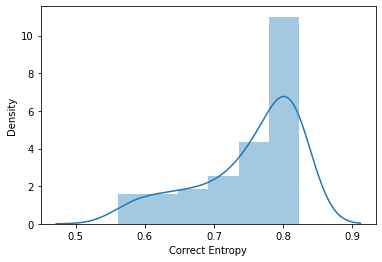

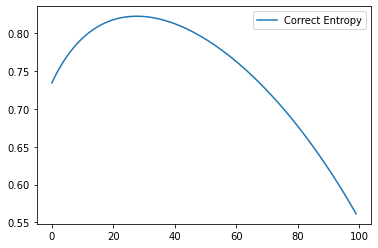

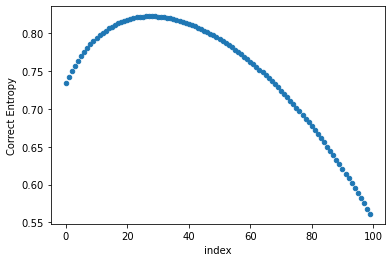

In [10]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [2]:
df1 = df.drop(['Approx Entropy'], axis = 1) # No correct entropy
df1.head()

,Correct Entropy,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.734460,0.423867,0.111389,0.048338,0.027470,0.018160,0.013099,0.009976,0.007885,0.006405,...,0.000096,0.000094,0.000092,0.000090,0.000088,0.000087,0.000085,0.000083,0.000082,0.000080
1,0.742817,0.427486,0.112914,0.049085,0.027899,0.018440,0.013300,0.010129,0.008007,0.006506,...,0.000097,0.000096,0.000094,0.000092,0.000090,0.000088,0.000087,0.000085,0.000083,0.000082
2,0.750508,0.430799,0.114319,0.049776,0.028296,0.018700,0.013486,0.010272,0.008120,0.006598,...,0.000099,0.000097,0.000095,0.000093,0.000092,0.000090,0.000088,0.000086,0.000085,0.000083
3,0.757592,0.433836,0.115614,0.050415,0.028663,0.018940,0.013659,0.010403,0.008225,0.006684,...,0.000101,0.000099,0.000097,0.000095,0.000093,0.000091,0.000090,0.000088,0.000086,0.000085
4,0.764122,0.436621,0.116808,0.051006,0.029003,0.019163,0.013818,0.010525,0.008322,0.006764,...,0.000102,0.000100,0.000098,0.000096,0.000094,0.000093,0.000091,0.000089,0.000087,0.000086


In [3]:
from sklearn.model_selection import train_test_split
X = df1
y = df['Correct Entropy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(90, 101)
(10, 101)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun

# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [5]:
model.fit(x = X_train, y = y_train, epochs = 500) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode

Epoch 1/500
3/3 [==============================] - 0s 1ms/step - loss: 0.5566 - mae: 0.7420
Epoch 2/500
3/3 [==============================] - 0s 986us/step - loss: 0.5030 - mae: 0.7051
Epoch 3/500
3/3 [==============================] - 0s 978us/step - loss: 0.4677 - mae: 0.6800
Epoch 4/500
3/3 [==============================] - 0s 498us/step - loss: 0.4384 - mae: 0.6582
Epoch 5/500
3/3 [==============================] - 0s 997us/step - loss: 0.4126 - mae: 0.6383
Epoch 6/500
3/3 [==============================] - 0s 498us/step - loss: 0.3889 - mae: 0.6196
Epoch 7/500
3/3 [==============================] - 0s 999us/step - loss: 0.3668 - mae: 0.6016
Epoch 8/500
3/3 [==============================] - 0s 998us/step - loss: 0.3459 - mae: 0.5841
Epoch 9/500
3/3 [==============================] - 0s 997us/step - loss: 0.3260 - mae: 0.5669
Epoch 10/500
3/3 [==============================] - 0s 499us/step - loss: 0.3069 - mae: 0.5499
Epoch 11/500
3/3 [==============================] - 0s 997us/

3/3 [==============================] - 0s 499us/step - loss: 2.7187e-04 - mae: 0.0131
Epoch 170/500
3/3 [==============================] - 0s 997us/step - loss: 2.2397e-04 - mae: 0.0127
Epoch 171/500
3/3 [==============================] - 0s 997us/step - loss: 2.3288e-04 - mae: 0.0120
Epoch 172/500
3/3 [==============================] - 0s 997us/step - loss: 2.1885e-04 - mae: 0.0120
Epoch 173/500
3/3 [==============================] - 0s 499us/step - loss: 2.0287e-04 - mae: 0.0118
Epoch 174/500
3/3 [==============================] - 0s 499us/step - loss: 1.9854e-04 - mae: 0.0111
Epoch 175/500
3/3 [==============================] - 0s 499us/step - loss: 2.1621e-04 - mae: 0.0124
Epoch 176/500
3/3 [==============================] - 0s 499us/step - loss: 1.8672e-04 - mae: 0.0104
Epoch 177/500
3/3 [==============================] - 0s 498us/step - loss: 2.3430e-04 - mae: 0.0125
Epoch 178/500
3/3 [==============================] - 0s 500us/step - loss: 1.9553e-04 - mae: 0.0111
Epoch 179/500


3/3 [==============================] - 0s 998us/step - loss: 2.9249e-05 - mae: 0.0041
Epoch 252/500
3/3 [==============================] - 0s 499us/step - loss: 2.5808e-05 - mae: 0.0041
Epoch 253/500
3/3 [==============================] - 0s 498us/step - loss: 2.5640e-05 - mae: 0.0040
Epoch 254/500
3/3 [==============================] - 0s 499us/step - loss: 2.7663e-05 - mae: 0.0044
Epoch 255/500
3/3 [==============================] - 0s 997us/step - loss: 6.6416e-05 - mae: 0.0069
Epoch 256/500
3/3 [==============================] - 0s 997us/step - loss: 2.9780e-05 - mae: 0.0041
Epoch 257/500
3/3 [==============================] - 0s 997us/step - loss: 2.3614e-05 - mae: 0.0041
Epoch 258/500
3/3 [==============================] - 0s 499us/step - loss: 2.6156e-05 - mae: 0.0039
Epoch 259/500
3/3 [==============================] - 0s 998us/step - loss: 2.5388e-05 - mae: 0.0040
Epoch 260/500
3/3 [==============================] - 0s 997us/step - loss: 6.0975e-05 - mae: 0.0066
Epoch 261/500


3/3 [==============================] - 0s 499us/step - loss: 2.2561e-05 - mae: 0.0045
Epoch 334/500
3/3 [==============================] - 0s 499us/step - loss: 2.3130e-05 - mae: 0.0046
Epoch 335/500
3/3 [==============================] - 0s 498us/step - loss: 5.6731e-06 - mae: 0.0021
Epoch 336/500
3/3 [==============================] - 0s 498us/step - loss: 2.5322e-06 - mae: 0.0012
Epoch 337/500
3/3 [==============================] - 0s 997us/step - loss: 1.8273e-06 - mae: 9.9596e-04
Epoch 338/500
3/3 [==============================] - 0s 997us/step - loss: 1.7692e-06 - mae: 0.0010
Epoch 339/500
3/3 [==============================] - 0s 997us/step - loss: 1.2506e-05 - mae: 0.0030
Epoch 340/500
3/3 [==============================] - 0s 997us/step - loss: 4.7981e-05 - mae: 0.0064
Epoch 341/500
3/3 [==============================] - 0s 998us/step - loss: 3.6957e-06 - mae: 0.0016
Epoch 342/500
3/3 [==============================] - 0s 500us/step - loss: 1.8227e-06 - mae: 9.7853e-04
Epoch 

3/3 [==============================] - 0s 997us/step - loss: 1.2431e-05 - mae: 0.0035
Epoch 497/500
3/3 [==============================] - 0s 499us/step - loss: 1.0840e-05 - mae: 0.0033
Epoch 498/500
3/3 [==============================] - 0s 498us/step - loss: 1.0243e-05 - mae: 0.0032
Epoch 499/500
3/3 [==============================] - 0s 499us/step - loss: 1.1044e-05 - mae: 0.0033
Epoch 500/500
3/3 [==============================] - 0s 499us/step - loss: 1.4129e-05 - mae: 0.0038


<AxesSubplot:>

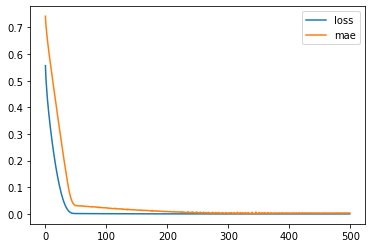

In [6]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [7]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

[1.2928350770380348e-05, 0.0035798398312181234]
[1.3479855624609627e-05, 0.003668147372081876]


In [8]:
test_predictions = model.predict(X_test)
test_predictions

array([[0.65791404],
       [0.78070706],
       [0.72066146],
       [0.8001161 ],
       [0.80211365],
       [0.81057286],
       [0.81666327],
       [0.67372894],
       [0.7901883 ],
       [0.7310519 ]], dtype=float32)

In [9]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare

,Correct Entropy,Model Predictions
0,0.661332,0.657914
1,0.784546,0.780707
2,0.724411,0.720661
3,0.803932,0.800116
4,0.805925,0.802114
5,0.814360,0.810573
6,0.820364,0.816663
7,0.677254,0.673729
8,0.793816,0.790188
9,0.734460,0.731052


### Two Intervals at Decompactification Limit (Varying $x$)

Note that in this case we can also fix $x$ while varying $\alpha$.

Only approximate analytic result known. We will temporily take it as the correct entropy.

Is it possible to find a better analytic result? (e.g. use some pre-trained model, under the assumption that analytic continuation is not pattern-less)

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

$k$ is only up to 100.

$x=0.1, x<0.6, x+=0.005$

10000 data points

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data_Two_Interval_decom.csv')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1.07696,1.046462,0.487760,0.160987,0.083663,0.052823,0.036960,0.027552,0.021450,0.017242,...,0.000275,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233
1,1.08691,1.055876,0.491345,0.162462,0.084450,0.053330,0.037326,0.027833,0.021675,0.017427,...,0.000279,0.000274,0.000269,0.000264,0.000259,0.000254,0.000250,0.000245,0.000241,0.000237
2,1.09631,1.064758,0.494707,0.163855,0.085195,0.053811,0.037672,0.028099,0.021888,0.017603,...,0.000283,0.000278,0.000273,0.000268,0.000263,0.000258,0.000253,0.000249,0.000244,0.000240
3,1.10520,1.073157,0.497867,0.165174,0.085902,0.054266,0.038001,0.028351,0.022091,0.017770,...,0.000287,0.000282,0.000276,0.000271,0.000266,0.000261,0.000257,0.000252,0.000248,0.000244
4,1.11363,1.081115,0.500845,0.166423,0.086573,0.054699,0.038313,0.028592,0.022283,0.017929,...,0.000291,0.000285,0.000280,0.000275,0.000270,0.000265,0.000260,0.000256,0.000251,0.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.29957,1.255346,0.562168,0.193860,0.101678,0.064488,0.045371,0.034026,0.026648,0.021537,...,0.000379,0.000372,0.000365,0.000359,0.000352,0.000346,0.000340,0.000334,0.000329,0.000323
96,1.29888,1.254711,0.561957,0.193760,0.101621,0.064452,0.045344,0.034006,0.026631,0.021524,...,0.000379,0.000372,0.000365,0.000359,0.000352,0.000346,0.000340,0.000334,0.000328,0.000323
97,1.29816,1.254033,0.561732,0.193654,0.101561,0.064412,0.045316,0.033984,0.026614,0.021509,...,0.000379,0.000372,0.000365,0.000358,0.000352,0.000346,0.000339,0.000334,0.000328,0.000322
98,1.29738,1.253311,0.561492,0.193540,0.101497,0.064371,0.045286,0.033961,0.026595,0.021494,...,0.000378,0.000371,0.000364,0.000358,0.000351,0.000345,0.000339,0.000333,0.000328,0.000322


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


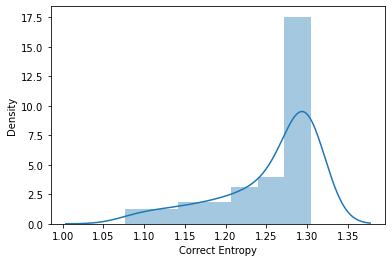

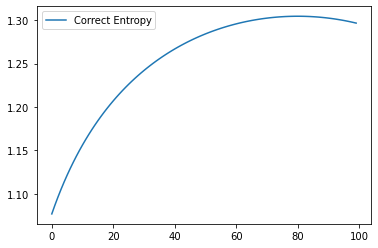

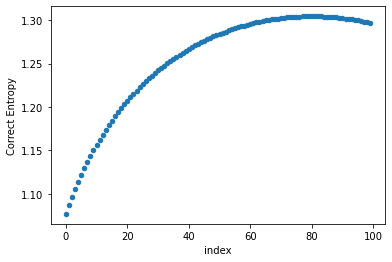

In [12]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [13]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.487760,0.160987,0.083663,0.052823,0.036960,0.027552,0.021450,0.017242,0.014205,0.011934,...,0.000275,0.000270,0.000265,0.000260,0.000255,0.000250,0.000246,0.000241,0.000237,0.000233
1,0.491345,0.162462,0.084450,0.053330,0.037326,0.027833,0.021675,0.017427,0.014361,0.012068,...,0.000279,0.000274,0.000269,0.000264,0.000259,0.000254,0.000250,0.000245,0.000241,0.000237
2,0.494707,0.163855,0.085195,0.053811,0.037672,0.028099,0.021888,0.017603,0.014509,0.012195,...,0.000283,0.000278,0.000273,0.000268,0.000263,0.000258,0.000253,0.000249,0.000244,0.000240
3,0.497867,0.165174,0.085902,0.054266,0.038001,0.028351,0.022091,0.017770,0.014650,0.012315,...,0.000287,0.000282,0.000276,0.000271,0.000266,0.000261,0.000257,0.000252,0.000248,0.000244
4,0.500845,0.166423,0.086573,0.054699,0.038313,0.028592,0.022283,0.017929,0.014783,0.012430,...,0.000291,0.000285,0.000280,0.000275,0.000270,0.000265,0.000260,0.000256,0.000251,0.000247


In [14]:
from sklearn.model_selection import train_test_split
X = df1
y = df['Correct Entropy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(90, 100)
(10, 100)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun

# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [16]:
model.fit(x = X_train, y = y_train, epochs = 500) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode

Epoch 1/500
3/3 [==============================] - 0s 996us/step - loss: 1.2961 - mae: 1.1371
Epoch 2/500
3/3 [==============================] - 0s 504us/step - loss: 1.2505 - mae: 1.1169
Epoch 3/500
3/3 [==============================] - 0s 499us/step - loss: 1.2183 - mae: 1.1024
Epoch 4/500
3/3 [==============================] - 0s 997us/step - loss: 1.1907 - mae: 1.0898
Epoch 5/500
3/3 [==============================] - 0s 498us/step - loss: 1.1654 - mae: 1.0782
Epoch 6/500
3/3 [==============================] - 0s 998us/step - loss: 1.1416 - mae: 1.0670
Epoch 7/500
3/3 [==============================] - 0s 498us/step - loss: 1.1188 - mae: 1.0563
Epoch 8/500
3/3 [==============================] - 0s 998us/step - loss: 1.0966 - mae: 1.0458
Epoch 9/500
3/3 [==============================] - 0s 998us/step - loss: 1.0749 - mae: 1.0354
Epoch 10/500
3/3 [==============================] - 0s 998us/step - loss: 1.0536 - mae: 1.0251
Epoch 11/500
3/3 [==============================] - 0s 499u

3/3 [==============================] - 0s 499us/step - loss: 0.0010 - mae: 0.0248
Epoch 173/500
3/3 [==============================] - 0s 499us/step - loss: 0.0010 - mae: 0.0262
Epoch 174/500
3/3 [==============================] - 0s 499us/step - loss: 0.0010 - mae: 0.0261
Epoch 175/500
3/3 [==============================] - 0s 499us/step - loss: 0.0010 - mae: 0.0249
Epoch 176/500
3/3 [==============================] - 0s 497us/step - loss: 0.0010 - mae: 0.0253
Epoch 177/500
3/3 [==============================] - 0s 499us/step - loss: 0.0010 - mae: 0.0263
Epoch 178/500
3/3 [==============================] - 0s 498us/step - loss: 0.0010 - mae: 0.0253
Epoch 179/500
3/3 [==============================] - 0s 498us/step - loss: 0.0010 - mae: 0.0269
Epoch 180/500
3/3 [==============================] - 0s 498us/step - loss: 0.0010 - mae: 0.0251
Epoch 181/500
3/3 [==============================] - 0s 997us/step - loss: 0.0010 - mae: 0.0265
Epoch 182/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 498us/step - loss: 7.1879e-04 - mae: 0.0213
Epoch 337/500
3/3 [==============================] - 0s 498us/step - loss: 7.1739e-04 - mae: 0.0219
Epoch 338/500
3/3 [==============================] - 0s 498us/step - loss: 7.5570e-04 - mae: 0.0217
Epoch 339/500
3/3 [==============================] - 0s 996us/step - loss: 7.1413e-04 - mae: 0.0216
Epoch 340/500
3/3 [==============================] - 0s 499us/step - loss: 7.2099e-04 - mae: 0.0222
Epoch 341/500
3/3 [==============================] - 0s 499us/step - loss: 7.2065e-04 - mae: 0.0211
Epoch 342/500
3/3 [==============================] - 0s 499us/step - loss: 7.1606e-04 - mae: 0.0218
Epoch 343/500
3/3 [==============================] - 0s 499us/step - loss: 7.1261e-04 - mae: 0.0217
Epoch 344/500
3/3 [==============================] - 0s 498us/step - loss: 7.6714e-04 - mae: 0.0214
Epoch 345/500
3/3 [==============================] - 0s 998us/step - loss: 6.9966e-04 - mae: 0.0213
Epoch 346/500


3/3 [==============================] - 0s 997us/step - loss: 6.0946e-04 - mae: 0.0191
Epoch 419/500
3/3 [==============================] - 0s 997us/step - loss: 6.0017e-04 - mae: 0.0201
Epoch 420/500
3/3 [==============================] - 0s 997us/step - loss: 5.8681e-04 - mae: 0.0193
Epoch 421/500
3/3 [==============================] - 0s 998us/step - loss: 5.7826e-04 - mae: 0.0193
Epoch 422/500
3/3 [==============================] - 0s 998us/step - loss: 6.3748e-04 - mae: 0.0200
Epoch 423/500
3/3 [==============================] - 0s 499us/step - loss: 6.0527e-04 - mae: 0.0201
Epoch 424/500
3/3 [==============================] - 0s 499us/step - loss: 5.8639e-04 - mae: 0.0199
Epoch 425/500
3/3 [==============================] - 0s 498us/step - loss: 5.7682e-04 - mae: 0.0186
Epoch 426/500
3/3 [==============================] - 0s 498us/step - loss: 5.8475e-04 - mae: 0.0196
Epoch 427/500
3/3 [==============================] - 0s 499us/step - loss: 5.8381e-04 - mae: 0.0205
Epoch 428/500


3/3 [==============================] - 0s 997us/step - loss: 4.8214e-04 - mae: 0.0178


<AxesSubplot:>

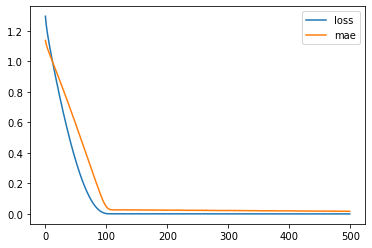

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

[0.0004715146205853671, 0.016912011429667473]
[0.0007059421623125672, 0.018580269068479538]


In [19]:
test_predictions = model.predict(X_test)
test_predictions

array([[1.289276 ],
       [1.2790974],
       [1.2880347],
       [1.2715664],
       [1.2704504],
       [1.2642182],
       [1.2326666],
       [1.289398 ],
       [1.195055 ],
       [1.143892 ]], dtype=float32)

In [20]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare

,Correct Entropy,Model Predictions
0,1.30426,1.289276
1,1.28817,1.279097
2,1.30229,1.288035
3,1.27629,1.271566
4,1.27453,1.270450
5,1.26471,1.264218
6,1.21514,1.232667
7,1.30445,1.289398
8,1.15637,1.195055
9,1.07696,1.143892


### General Two Intervals 

No analytic result known. 3 approaches:
1. We sum up to a high enough $k$, take that as the correct entropy, but we only provide data points for a range of small $k$. (Might not be very feasible as it is computational expensive)

2. We provide data points up to $k$, try to predict the value at $k+1$.

3. We use some pre-trained models to predict the correct entropy (under the assumption that analytic continuation is not pattern-less).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data_Two_Interval_general.csv')
df

,Approx Entropy,1,2,3,4,5
0,0.817893,0.486448,0.160007,0.082875,0.052165,0.036398
1,0.843584,0.499866,0.165680,0.085970,0.054192,0.037876
2,0.864144,0.510477,0.170265,0.088486,0.055839,0.039076
3,0.881031,0.519111,0.174059,0.090579,0.057209,0.040074
4,0.895161,0.526279,0.177252,0.092347,0.058367,0.040916
5,0.907145,0.532318,0.179973,0.093860,0.059357,0.041637
6,0.917408,0.537460,0.182312,0.095165,0.060212,0.042259
7,0.926255,0.541872,0.184336,0.096297,0.060953,0.042798
8,0.933915,0.545676,0.186093,0.097282,0.061598,0.043267
9,0.940561,0.548964,0.187621,0.098140,0.062161,0.043675


In [3]:
df1 = df.drop(['Approx Entropy'], axis = 1)
df1.head()

,1,2,3,4,5
0,0.486448,0.160007,0.082875,0.052165,0.036398
1,0.499866,0.165680,0.085970,0.054192,0.037876
2,0.510477,0.170265,0.088486,0.055839,0.039076
3,0.519111,0.174059,0.090579,0.057209,0.040074
4,0.526279,0.177252,0.092347,0.058367,0.040916


In [ ]:
from sklearn.model_selection import train_test_split
X = df1
y = df['Correct Entropy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# We don't need to worry about the input dimensions, the layers will automatically infer input shape as the shape of 
# the first inputs they see.

# Write the layers separately such that it is easy to comment out each layer
# Note we don't need to worry about input/output sizes that connect each layer, Keras will handle it automatically.

model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) 
# The final layer has only 1 node as we are predicting a single value of correct entropy

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 
#Root Mean Squared Propagation as optimizer and  Mean Squared Error as loss fun

# Note we can have customized setup (have to build from scratch):
# model.compilte(optimizer = keras.optimizers.RMSprop(learning_rate=1e-4, loss = my_custom_loss, 
# metrics=[my_custom_metric_1, my_custom_metric_2])

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 500) 

# Note we haven't implemented the batch_size.
# can set verbose=0 to turn on silent mode

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
print(model.evaluate(X_train, y_train, verbose=0)) # The training error
print(model.evaluate(X_test, y_test, verbose=0))   # The test error

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

In [ ]:
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
df_compare